---  
pagetitle: "DA-2-proj | VG"
title:     "The Analysis of *Apple Podcasts* Reviews"
subtitle:  "Data Analysis Project"
author:    "Vilmantas Gėgžna"
date: 2023-01-04
date-modified: today
date-format: iso
language:
  title-block-modified: "Updated"
fig-align: center
jupyter: python3
format:
  html:
    embed-resources: true
    toc: true
    toc_float: true
    toc-location: left
    toc-depth: 4
    number-sections: true
    number-depth: 3
    code-tools: true
    code-fold: show # possible options: false, true, show
    code-summary: "Python code"
    html-math-method: mathjax
    link-external-newwindow: true
    link-external-icon: true
    link-external-filter: "gegznav.github.io|mokymai.github.io|.*ds-project.*"
    page-layout: full
    include-after-body: # To bold "Fig" and "Table" in captions.
      text: |
        <script>
        document.addEventListener("DOMContentLoaded", () => {
          document.querySelectorAll("figcaption").forEach(e => {
          e.innerHTML = e.innerHTML.replace(/^((Fig.*?)&nbsp;\d+([.]\d+[.]))/, "<strong>$1</strong>")})
        });
        document.addEventListener("DOMContentLoaded", () => {
          document.querySelectorAll("caption").forEach(e => {
          e.innerHTML = e.innerHTML.replace(/^(Table.*?&nbsp;\d+([.]\d+[.]))/, "<strong>$1</strong>")})
        });
        </script>
crossref:
  chapters: true
  fig-title: 'Fig.'    # (default is "Figure")
  tbl-title: Table     # (default is "Table")
  title-delim: .       # (default is ":")
editor: # VS Code
  render-on-save: false
---

<style>
#title-block-header.quarto-title-block.default .quarto-title-meta {
  display: grid;
  grid-template-columns: repeat(3, 1fr);
}

div.sourceCode {
  margin: 0;
}

/* R code indicator */
pre.sourceCode .r {
  border-left: 5px solid #7b97ea;
  border-radius: 0
}
.r .fu {font-weight: bold;}

/* Python code indicator */
pre.sourceCode .python {
  border-left: 5px solid #CFB53B;
  border-radius: 0
}
.python .kw {font-style: italic;}

/* Details sections */

details[open].with-border {
  padding: 1px 5px 1px 5px;
  border-style: solid;
  border-color: grey;
  border-width: 3px;
  border-radius: 5px;
}

/* Tables */
caption, .table-caption {
  text-align: left;
  color: #5a6570;
};

table .dataframe .table-striped thead th {
  text-align: left !important;
}


</style>

::: {.content-hidden when-format="html"}

This cell contains `CSS` code.   

:::

<center>

![Project logo. Generated with [Leonardo.Ai](https://leonardo.ai/).](./img/logo-apple-podcasts-proj(Leonardo.Ai).jpg){max-width=100%, width=400px}

</center>


***Tools:*** Python, SQL, R, Looker Studio  
***Helper tools:*** VSCode, Quarto, Git  
***Skills:***  

- data pre-processing
- exploratory data analysis (**EDA**):
    - descriptive statistics
    -  data visualization 
- **inferential statistics**: 
    - hypothesis testing
    -  confidence intervals
- statistical programming
- literate programming
- dashboarding

**Technical requirements:**

- the analysis must include inferential statistics procedures.
- create a Looker Studio dashboard based on the analysis.

# Abbreviations {.unnumbered}

- CI – 95% confidence interval.
- CLD - compact letter display.
- gof, GOF – goodness of fit.
- n – either sample size or group size.
- ns – not significant.
- p – p-value.
- `p_adj` – p-value (adjusted).
- r – correlation coefficient (Spearman's).
- UTC – coordinated universal time.
- wo – without.
- π – pi (proportion).
- χ² – chi-squared.

# Introduction

A **podcast** is a series of spoken word episodes, all focused on a particular topic or theme, like cycling or startups
(source: [The Podcast Host](https://www.thepodcasthost.com/listening/what-is-a-podcast/)).
It is a program made available in digital format either for download over the Internet
(source: [Wikipedia](https://en.wikipedia.org/wiki/Podcast)) or watching/listening online.
[Apple Podcasts](https://www.apple.com/apple-podcasts/) is one of the prominent platforms dedicated to hosting podcasts.
This project is **focused on** the analysis of podcasts (their categories, reviews and ratings) hosted on this platform.

## Purpose




This analysis **aims** to investigate:

a. the **number of reviews** as well as  
b. **ratings** of podcasts

and their

- temporal **trends and patterns** as well as 
- **relationships** between these two variables and features including various podcasts' titles review titles and review body length metrics and number of categories/sub-categories per podcast.

c. **popularity of** podcast **categories**.



# Methods

For statistical inference, significance level $\alpha=0.05$ and 95% confidence level are used.

## Population and Sample

It is assumed that the data is a simple random sample or its equivalent that allows using inferential statistics methods.
In most cases, where various features of reviews are analyzed, the **population** can be defined as:

- **reviews** of podcasts on the Apple Podcasts platform.
  
In cases, where metrics aggregated for each podcast are used, the **population** can be defined as:

- **podcasts** on the Apple Podcasts platform.

Lastly, in the analysis of categories, as the same podcast can have several categories, it was assumed that category is a separate independent observational unit (and category labels as well as podcast information were treated as features of each category). In this case, the **population** can be defined as:

- podcasts **categories** on the Apple Podcasts platform.


## Differences Between Groups 

For statistical inference about several groups (categories), the following strategy is used:

- *first*, 95% **confidence intervals** (CI) for each group are calculated,
- *second*, an **omnibus** test is performed,
- *third*, when the result of the omnibus statistical test is significant, a ***post-hoc*** analysis (pair-wise comparisons) is performed. 


In *post-hoc* analysis, $p$ values are adjusted with Holm correction to control the inflated probability of type 1 error. What is more, the results of pair-wise comparisons are compactly presented as **CLD**¹ (compact letter display) representation of adjusted $p$ values.

¹ `IMPORTANT:` In CLD representation of the results, a letter shared by several groups (e.g., control and treatment) indicates that the results are statistically insignificant ($p\ge\alpha$), and lack of shared letter shows statistically significant results. The main advantage of CLD is that instead of $\frac{k \cdot (k-1)}{2}$ $p$ values in each-to-each group pair-wise comparisons we get $k$ CLD representations of the same results, i.e., results are easier to understand if many groups are compared. Here $k$ is the number of groups.



a) **In the analysis of differences between group/category counts**  
*(e.g., the analysis of the number of reviews per certain time period),*  
the following methods are used:
   - *plot:* bar chart with absolute counts on the y-axis and percentage values as
             bar labels.
   - *confidence intervals:* **Goodman's** simultaneous confidence intervals of proportions;
   - *omnibus:* Pearson's **chi-square** (χ²) goodness-of-fit (GOF) test,
       + *hypotheses:*   
           $H_0:$ All proportions are equal:  $~ \pi_1 = \pi_2 = ... = \pi_i = ... = \pi_k$   
           $H_1:$ At least two proportions differ: 
           $\pi_i \ne \pi_j$ for at least single pair of i and j.
   - *post-hoc:* **pair-wise chi-square** χ² GOF test (with Holm correction),
       + *hypotheses:*   
           $H_0:$ Both proportions are equal: $~ \pi_i = \pi_j$,    
           $H_1:$ Proportions differ: $~ \pi_i \ne \pi_j$.

   Here $\pi$ (pi) is a proportion (relative frequency, percentage) of values in a certain group,  
   $i$ and $j$ are group indices ($i$ = 1, 2, ..., $k$;  $j$ = 1, 2, ..., $k$; $i \ne j$),      
   $k$ – total number of groups.




b) **In the analysis of differences between continuous/numeric data groups:**  
*(e.g., the analysis of ratings grouped by time periods),*  
the following methods are used:
   - *plot:* dot/scatter plot where dots represent means and error bars indicate 95% CI. 
      As in most cases the sample size is very large, and most errors are small, so error bars may not be visible.
   - *confidence intervals:* **t-distribution-based** confidence intervals for mean;
   - *omnibus:* non-parametric **Kruskal-Wallis** test,
       + *hypotheses:*  
           $H_0:$ No stochastic dominance among the groups,  
           $H_1:$ At least one group stochastically dominates one other group.
   - *post-hoc:* non-parametric **Conover-Iman** test (with Holm correction), 
       + *hypotheses:*  
           $H_0:$ No stochastic dominance between the two groups,   
           $H_1:$ One group stochastically dominates the other group.

   The term "stochastic dominance" means that one of the groups tends to have (statistically) larger values than some other group.

   



## Correlation Between Variables

For the relationship between numeric variables, non-parametric **Spearman's** rank **correlation** analysis is used. 

- *Hypotheses:*  
        $H_0:$ $\rho_s = 0$ (variables do not correlate),  
        $H_1:$ $\rho_s \ne 0$ (variables correlate).

    Here $\rho_s$ (rho) is the population Spearman's correlation coefficient.

In temporal patterns and trends analysis, no p-value correction is applied.
And for the correlation analyses where variables of the number of reviews and ratings are used several times, to prevent an inflated type 1 error rate, Holm correction is applied.

# Preparation and Inspection

In this section, statistical software is prepared for the analysis, data are imported into statistical software, inspected, and pre-preprocessed to be ready for a deeper statistical analysis.  

## Setup

In [1]:
# Automatically reload certain modules
%reload_ext autoreload
%autoreload 1

%aimport functions


# Packages and modules -------------------------------
import os
import warnings

# To connect SQL database
import sqlalchemy as sql

# Data wrangling, math
import numpy as np
import pandas as pd

# Statistical analysis
import scipy.stats as sps
import statsmodels.stats.api as sms
import pingouin as pg
import scikit_posthocs as sp

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Custom functions
import functions as my

# Enable ability to run R in Python code cells
os.environ["R_HOME"] = "C:/PROGRA~1/R/R-4.3.1"

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    import rpy2

    %load_ext rpy2.ipython

# Settings --------------------------------------------
# Default plot options
plt.rc("figure", titleweight="bold")
plt.rc("axes", labelweight="bold", titleweight="bold")
plt.rc("font", weight="normal", size=10)
plt.rc("figure", figsize=(7, 3))

# Pandas options
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_colwidth", 40)  # Possible option: None
pd.set_option("display.float_format", lambda x: f"{x:.2f}")
pd.set_option("styler.format.thousands", ",")

# colors
green, blue, orange, red = "tab:green", "tab:blue", "tab:orange", "tab:red"

In this section, *ad-hoc* (specialized for this analysis) functions are defined.
The more generalizable functions can be found in `functions.py` and `functions.R` files of this project.

In [2]:
# Main analysis functions


def analyze_counts(
    counts,
    by: str,
    xlabel=None,
    ylabel=None,
    counts_of: str = "review",
    **kwargs,
):
    """The main function to analyze count data

    - Performs omnibus chi-squared and post-hoc pair-wise chi-squared test.
    - Compactly presents results of post-hoc test as CLD
      (compact letter display, where shared CLD letter show no significant
      difference between groups).
      NOTE: cld computations require R.
    - Calculates percentages and their confidence intervals by using Goodman's
      method.
    - Creates summary of grouped values (group counts and percentages).
    - Plots results as bar plots with percentage labels.

    Args:
        counts (pandas.Series[int]): Count data to analyze.
        by (str): Grouping variable name. Used to create labels.
        xlabel (str, None, optional): X axis label.
                Defaults to None: autogenerated label.
        ylabel (str, None, optional): Y axis label.
                Defaults to None: autogenerated label.
        counts_of (str, optional): The thing that was counted. Used for labels.
                Defaults to "review".
        **kwargs: further arguments passed to `my.plot_counts_with_labels()`
    """
    # Omnibus test
    my.display_collapsible(
        my.test_chi_square_gof(counts), "Omnibus (chi-squared) test results"
    )

    # Post-hoc pairwise chi-square
    posthoc_p = my.pairwise_chisq_gof_test(counts)
    posthoc_cld = my.convert_pairwise_p_to_cld(posthoc_p, output_gr_var=by)

    # Confidence interval
    n_label = f"n_{counts_of}s"
    ci = (
        my.ci_proportion_multinomial(counts, method="goodman", n_label=n_label)
        .rename_axis(by)
        .reset_index()
    )

    # Make sure datasets are mergeable
    ci[by] = ci[by].astype(str)
    posthoc_cld[by] = posthoc_cld[by].astype(str)

    # Merge results
    n_per_category = pd.merge(ci, posthoc_cld, on=by)

    # Descriptive statistics: calculate
    to_format = ["min", "max", "range", "mean", "median", "std", "mad"]

    format_0f = lambda x: [f"{i:,.0f}" for i in x]

    summary_count = my.calc_summaries(ci[n_label])
    summary_count[to_format] = summary_count[to_format].apply(format_0f)

    summary_perc = my.calc_summaries(ci["percent"])
    summary_perc[to_format] = summary_perc[to_format].apply(my.format_percent)

    # Format percentages and counts
    vars = ["percent", "ci_lower", "ci_upper"]
    n_per_category[vars] = n_per_category[vars].apply(my.format_percent)

    my.display_collapsible(
        n_per_category.style.format({n_label: "{:,.0f}"}),
        f"{counts_of.capitalize()} counts with 95% CI and post-hoc "
        " (pairwise chi-squared) test results",
    )

    # Descriptive statistics: display
    my.display_collapsible(
        pd.concat([summary_count, summary_perc]),
        f"Descriptive statistics of group ({by}) counts",
    )

    # Plot
    if xlabel is None:
        xlabel = by.capitalize()

    if ylabel is None:
        ylabel = f"Number of {counts_of}s"

    my.plot_counts_with_labels(
        n_per_category, x_lab=xlabel, y_lab=ylabel, y=n_label, **kwargs
    )
    my.ax_axis_comma_format("y")

    # Output
    return n_per_category


def analyze_numeric_groups(
    y: str, by: str, data, title=None, xlabel=None, ylabel=None
):
    """The main function to analyze numeric/continuous data by groups

    - Calculates mean ratings per group and their confidence intervals using
      t distribution.
    - Performs omnibus (Kruskal-Wallis) and post-hoc (Conover-Iman) tests.
    - Compactly presents results of post-hoc test as CLD
      (compact letter display, where shared CLD letter show no significant
      difference between groups).
      NOTE: cld computations require R.
    - Creates summary of grouped values (group counts and percentages).
    - Plots results as points with 95% confidence interval error bars.

    Args:
        y (str): Name of numeric/continuous (dependent) variable.
        by (str): Name of grouping (independent) variable.
        data (pandas.DataFrame): data frame with variables indicated in
             `y` and `by`.
        xlabel (str, None, optional): X axis label.
                Defaults to None: capitalized value of `by`.
        ylabel (str, None, optional): Y axis label.
                Defaults to None: capitalized value of `y`.
        title (str, None, optional): The title of the plot.
                Defaults to None.
    """

    # Omnibus test: Kruskal-Wallis test
    stat_rez = pg.kruskal(data=data, dv=y, between=by)
    stat_rez["p-unc"] = my.format_p(stat_rez["p-unc"][0])

    my.display_collapsible(stat_rez, "Omnibus (Kruskal-Wallis) test results")

    # Confidence intervals
    ci_raw = data.groupby(by)[y].apply(
        lambda x: [np.mean(x), *sms.DescrStatsW(x).tconfint_mean()]
    )
    ci = pd.DataFrame(
        list(ci_raw),
        index=ci_raw.index,
        columns=["mean", "ci_lower", "ci_upper"],
    ).reset_index()

    # Post-hoc test: Conover-Iman test
    posthoc_p_matrix = sp.posthoc_conover(
        data, val_col=y, group_col=by, p_adjust="holm"
    )
    posthoc_p_df = my.as_df(
        posthoc_p_matrix.stack(), ["group1", "group2"], "p.adj"
    )
    posthoc_cld = my.convert_pairwise_p_to_cld(posthoc_p_df, output_gr_var=by)

    # Make sure datasets are mergeable
    ci[by] = ci[by].astype(str)
    posthoc_cld[by] = posthoc_cld[by].astype(str)

    ci_and_cld = pd.merge(posthoc_cld, ci, on=by)

    # Display CI and CLD
    my.display_collapsible(
        ci_and_cld,
        "Post-hoc (Conover-Iman) test results as CLD and "
        "Confidence intervals (CI) of ratings",
    )

    # Descriptive statistics of means
    my.display_collapsible(
        my.calc_summaries(ci["mean"]),
        f"Descriptive statistics of group ({by}) means",
    )

    # Plot
    fig, ax = plt.subplots()

    x = ci.iloc[:, 0]

    ax.errorbar(
        x=x,
        y=ci["mean"],
        yerr=[ci["mean"] - ci["ci_lower"], ci["ci_upper"] - ci["mean"]],
        mfc="red",
        ms=2,
        mew=1,
        fmt="ko",
        zorder=3,
    )

    ax.axhline(
        y=ci["mean"].mean(),
        color="lightgray",
        linestyle="--",
        label="Reference line (mean of means)",
        zorder=1,
    )

    if xlabel is None:
        xlabel = by.capitalize()
    if ylabel is None:
        ylabel = y.capitalize()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_ylim([4, 5])
    ax.set_title(title)

    ax.legend(frameon=False, loc="lower right")

    # Output
    return ci_and_cld


def analyze_ratings(
    by, title=None, xlabel=None, ylabel=None, y="rating", data=None
):
    """The main function to analyze ratings

    See the description of function `analyze_numeric_groups()` for more details.
    The environment, in which function is called, must have variable
    (data frame) `data_reviews`.

    """
    if data is None:
        data = data_reviews
    return analyze_numeric_groups(
        y=y, by=by, data=data, title=title, xlabel=xlabel, ylabel=ylabel
    )


def plot_scatter(data_x, data_y, by, corr=None, counts_of: str = "review"):
    """Plot relationship between mean rating and number of reviews
       aggregated by group

       This is convenience function to merge and plot the results of
       functions `analyze_counts()` and `analyze_ratings()`.
    Args:
        data_x (pandass.Dataframe): Data frame with required data.
        data_y (pandass.Dataframe): Data frame with required data.
        by (str): variable used for aggregation.
        corr (str, None, optional): if "Spearman", the results of
             Spearman's correlation analysis are printed.
        counts_of (str, optional): The thing that was counted.
                Used for creating variable name and labels.
                Defaults to "review".
    """
    assert corr in [
        "Spearman",
        None,
    ], f"Unknown value for argument `corr`: {corr}"

    x_var = f"n_{counts_of}s"

    data_merged = pd.merge(data_x, data_y, on=by)
    data_merged.plot.scatter(
        x=x_var,
        y="mean",
        figsize=(3.5, 3),
        rot=45,
        xlabel=f"Number of {counts_of}s",
        ylabel="Average rating",
        title=f"Relationship Between Metrics \n"
        f"Aggregated by {by.capitalize()}",
    )
    my.ax_axis_comma_format("x")

    r, p = sps.spearmanr(data_merged[x_var], data_merged["mean"])

    if corr == "Spearman":
        print(f"Spearman's correlation: r = {r:.2f}, {my.format_p(p)}")


def do_corr_1_vs_other(data, var_x, corr_result=None):
    """Perform Spearman correlation analysis in 1-vs-remaining style

    Perform Spearman correlation between the selected and all the remaining
    numeric variables in the dataset.

    Args:
        data (pandas.DataFrame): Data frame with variables to analyze.
        var_x (str): variable used as the first variable in correlation
                     analysis.
        corr_result (list or None): List to collect the results of analysis.
                    Defaults to None.

    Returns:
        list: `corr_result` with appended results
    """
    # Initiate list, if not provided
    if corr_result is None:
        corr_result = []

    # The second column (var_y) must be numeric
    columns_to_include = (
        data.select_dtypes("number").drop(var_x, axis=1).columns
    )
    # Do analysis and collect the results
    for var_y in columns_to_include:
        if var_x == var_y:
            continue
        r, p = sps.spearmanr(data[var_x], data[var_y], nan_policy="omit")
        corr_result.append(
            {"variable_1": var_x, "variable_2": var_y, "r": r, "p": p}
        )
    # Return results
    return corr_result

## Database

The database is downloaded from [Kaggle](https://www.kaggle.com/datasets/thoughtvector/podcastreviews/versions/27). 
At the moment of analysis, the newest version of the database is v27. 
It consists of 4 tables:

- `runs`: facts on database updates.
- `podcasts`: podcast names, URLs, and similar data.
- `categories`: data on categories of podcasts.
- `reviews`: reviews and ratings of podcasts. 

In [3]:
# Create a connection to the database.
db_engine = sql.create_engine(
    "sqlite:///data/podcast-reviews-database-v27.sqlite"
)

In [4]:
# List tables
sql.inspect(db_engine).get_table_names()

['categories', 'podcasts', 'reviews', 'runs']

Entity relationship diagram (ERD) of this database:

<details><summary>Code</summary>

The following code was used to create the ERD:

```bash
eralchemy2 -i sqlite:///data/podcast-reviews-database-v27.sqlite \
           -o img/podcast-reviews-database-v27--erd.jpg
```

</details>


![Entity relationship diagram of Apple Podcasts Review database on Kaggle.](img/podcast-reviews-database-v27--erd.jpg)

As metadata is poor in this database, there are no connections drawn between the tables.
The following sections will inspect, explore and analyze the data in more detail.

## Data Import and Inspection

This section deals with individual (not merged) data frames.

### Import and Inspection: "runs"

The `runs` dataset contains information on when the database was last updated.

In [5]:
data_runs = pd.read_sql("SELECT * FROM runs;", db_engine)
print(f'The database was last updated on: {data_runs["run_at"].max()}')

The database was last updated on: 2022-12-10 01:17:07


### Import and Inspection: "podcasts"

The `podcass` table contains data on 109,602 podcasts. There are 745 podcasts with a non-unique name. No other discrepancies were detected.

In [6]:
data_podcasts = pd.read_sql("SELECT * FROM podcasts;", db_engine)

In [7]:
data_podcasts.shape

(109602, 5)

In [8]:
data_podcasts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109602 entries, 0 to 109601
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   podcast_id  109602 non-null  object
 1   itunes_id   109602 non-null  int64 
 2   slug        109602 non-null  object
 3   itunes_url  109602 non-null  object
 4   title       109602 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.2+ MB


In [9]:
data_podcasts.isna().sum()

podcast_id    0
itunes_id     0
slug          0
itunes_url    0
title         0
dtype: int64

In [10]:
data_podcasts.head()

,podcast_id,itunes_id,slug,itunes_url,title
0,a00018b54eb342567c94dacfb2a3e504,1313466221,scaling-global,https://podcasts.apple.com/us/podcas...,Scaling Global
1,a00043d34e734b09246d17dc5d56f63c,158973461,cornerstone-baptist-church-of-orlando,https://podcasts.apple.com/us/podcas...,Cornerstone Baptist Church of Orlando
2,a0004b1ef445af9dc84dad1e7821b1e3,139076942,mystery-dancing-in-the-dark,https://podcasts.apple.com/us/podcas...,Mystery: Dancing in the Dark
3,a00071f9aaae9ac725c3a586701abf4d,1332508972,kts-money-matters,https://podcasts.apple.com/us/podcas...,KTs Money Matters
4,a000a500f06555f81220c3eb641aded7,1544900779,word-on-the-street-w-dreak-swift,https://podcasts.apple.com/us/podcas...,Word on the Street w/ Dreak Swift


In [11]:
unique_podcast_count = my.count_unique(data_podcasts)
unique_podcast_count

,n_unique,percent_unique
podcast_id,109602,100.0%
itunes_id,109602,100.0%
slug,108503,99.0%
itunes_url,109602,100.0%
title,108857,99.3%


In [12]:
# Count podcasts with non-unique name
n_unique_itunes_id = unique_podcast_count.loc["itunes_id", "n_unique"]
n_unique_title = unique_podcast_count.loc["title", "n_unique"]

n_unique_itunes_id - n_unique_title

745

### Import and Inspection: "categories"

The `categories` dataset contains data on podcast categories. 
There are 211,760 entries for categories (one row per podcast-category combination) and 109,602 unique podcasts (the same number as in the previous dataset).
 
Before importing into Python, some similar categories were merged to create a new variable `category`.
The old variable with categories was renamed to `sub_category` (i.e., these categories no are treated as sub-categories).
So there are 19 categories and 110 sub-categories in the dataset.

In [13]:
data_categories = pd.read_sql_query(
    """--sql
    SELECT 
        c.podcast_id,
        CASE
            WHEN c.category LIKE 'arts%' THEN 'arts'
            WHEN c.category LIKE 'business%' THEN 'business'
            WHEN c.category LIKE 'comedy%' THEN 'comedy'
            WHEN c.category LIKE 'true-crime%' THEN 'crime'
            WHEN c.category LIKE 'education%' THEN 'education'
            WHEN c.category LIKE 'fiction%' THEN 'fiction'
            WHEN c.category LIKE 'tv-film%' THEN 'tv/film'
            WHEN c.category LIKE 'government%' THEN 'government'
            WHEN c.category LIKE 'health-fitness%' THEN 'health/fitness'
            WHEN c.category LIKE 'history%' THEN 'history'
            WHEN c.category LIKE 'kids-family%' THEN 'kids/family'
            WHEN c.category LIKE 'leisure%' THEN 'leisure'
            WHEN c.category LIKE 'music%' THEN 'music'
            WHEN c.category LIKE 'news%' THEN 'news'
            WHEN c.category LIKE 'science%' THEN 'science'
            WHEN c.category LIKE 'society-culture%' THEN 'society/culture'
            WHEN c.category LIKE 'sports%' THEN 'sports'
            WHEN c.category LIKE 'technology%' THEN 'technology'
            WHEN c.category LIKE 'religion%' OR
                 c.category LIKE 'spirituality%' OR
                 c.category LIKE 'buddhism%' OR
                 c.category LIKE 'christianity%' OR
                 c.category LIKE 'hinduism%' OR
                 c.category LIKE 'islam%' OR
                 c.category LIKE 'judaism%' THEN 'religion/spirituality' 
            END AS category,
        c.category as sub_category
    FROM categories AS c;
    """,
    db_engine,
)

In [14]:
data_categories.shape

(211760, 3)

In [15]:
data_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211760 entries, 0 to 211759
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   podcast_id    211760 non-null  object
 1   category      211760 non-null  object
 2   sub_category  211760 non-null  object
dtypes: object(3)
memory usage: 4.8+ MB


In [16]:
data_categories.isna().sum()

podcast_id      0
category        0
sub_category    0
dtype: int64

In [17]:
data_categories.head()

,podcast_id,category,sub_category
0,c61aa81c9b929a66f0c1db6cbe5d8548,arts,arts
1,c61aa81c9b929a66f0c1db6cbe5d8548,arts,arts-performing-arts
2,c61aa81c9b929a66f0c1db6cbe5d8548,music,music
3,ad4f2bf69c72b8db75978423c25f379e,arts,arts
4,ad4f2bf69c72b8db75978423c25f379e,arts,arts-design


In [18]:
my.count_unique(data_categories)

,n_unique,percent_unique
podcast_id,109602,51.8%
category,19,<0.1%
sub_category,110,0.1%


### Import and Inspection: "reviews"

There are 2,025,333 entries in the dataset and 652 are identified as duplicates.
The number of unique review authors (n = 1,451,063) is smaller than the number of unique podcasts (the ratio of the number of podcasts to the number of unique authors is ~0.7, which means that, on average, one in 2 users creates a single review and every second user creates at least 2 reviews).
The number of unique podcasts is 111,125 and this number is higher than in previous datasets.
This should be investigated in more detail (see the section on several datasets).

All timestamps of reviews are in UTC-07:00 timezone. Some dates were in a strange format/language (e.g., `٢٠٢٠-١٢-٢٤T١١:٥٥:٠٨-07:00`) but Python functions manage to automatically standardize even this type of dates. 

No other discrepancies were found.

In [19]:
data_reviews = pd.read_sql("SELECT * FROM reviews;", db_engine)

In [20]:
data_reviews.shape

(2025333, 6)

In [21]:
data_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2025333 entries, 0 to 2025332
Data columns (total 6 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   podcast_id  object
 1   title       object
 2   content     object
 3   rating      int64 
 4   author_id   object
 5   created_at  object
dtypes: int64(1), object(5)
memory usage: 92.7+ MB


In [22]:
data_reviews.isna().sum()

podcast_id    0
title         0
content       0
rating        0
author_id     0
created_at    0
dtype: int64

In [23]:
data_reviews.head(2)

,podcast_id,title,content,rating,author_id,created_at
0,c61aa81c9b929a66f0c1db6cbe5d8548,really interesting!,Thanks for providing these insights....,5,F7E5A318989779D,2018-04-24T12:05:16-07:00
1,c61aa81c9b929a66f0c1db6cbe5d8548,Must listen for anyone interested in...,Super excited to see this podcast gr...,5,F6BF5472689BD12,2018-05-09T18:14:32-07:00


In [24]:
my.count_unique(data_reviews)

,n_unique,percent_unique
podcast_id,111125,5.5%
title,1117416,55.2%
content,2008001,99.1%
rating,5,<0.1%
author_id,1451063,71.6%
created_at,2012360,99.4%


In the `reviews` table, there are duplicated records.
They will be removed in the pre-processing step.

In [25]:
review_duplicates = data_reviews.duplicated()
print(f"There are review duplicates: {review_duplicates.any()}")
print(f"Number of review duplicates: {review_duplicates.sum()}")

There are review duplicates: True
Number of review duplicates: 652


The time zone of all review timestamps is -07:00:

In [26]:
tz = data_reviews["created_at"].str.extract(r"(-\d{2}:\d{2})$")
tz.value_counts()

-07:00    2025333
Name: count, dtype: int64

Some dates are in a strange format (see the largest values):

In [27]:
data_reviews["created_at"].agg([min, max])

min    2005-12-09T21:41:01-07:00
max    ٢٠٢٠-١٢-٢٤T١١:٥٥:٠٨-07:00
Name: created_at, dtype: object

In [28]:
sorted_dates = data_reviews["created_at"].sort_values()

print("\nLargest timestamps of reviews: \n")
print(sorted_dates.tail())


Largest timestamps of reviews: 

2025300    2022-12-08T07:56:21-07:00
2025302    2022-12-08T11:14:54-07:00
2025326    2022-12-08T12:12:47-07:00
1136903    ٢٠٢٠-١٢-٢٤T٠٨:٢٦:٣٦-07:00
1136904    ٢٠٢٠-١٢-٢٤T١١:٥٥:٠٨-07:00
Name: created_at, dtype: object


It seems that conversion to Pandas `datetime` format solves this issue.

In [29]:
print("The same timestamps after the conversion to datetime format: ")
pd.to_datetime(sorted_dates.tail(), format='mixed')

The same timestamps after the conversion to datetime format: 


2025300   2022-12-08 07:56:21-07:00
2025302   2022-12-08 11:14:54-07:00
2025326   2022-12-08 12:12:47-07:00
1136903   2020-12-24 08:26:36-07:00
1136904   2020-12-24 11:55:08-07:00
Name: created_at, dtype: datetime64[ns, UTC-07:00]

## Pre-Processing of Individual Data Frames

This section deals with individual (not merged) data frames.
Data frame "runs" was not included in the further analysis so there is no dedicated sub-subsection for it.

### Pre-Processing: "podcasts"

Information on **slug** and **podcast title** length metrics were extracted as additional features:

- For **slug**:
    1. number of characters, 
    2. number of hyphens, 
    3. number of characters without hyphens,
    4. average word length.

- For **podcast title**:
    5. number of characters,
    6. number of words, 
    7. average word length.

In [30]:
# Here word is substring that contains digits, letters, underscores and hyphens
# (when hyphens are in the middle of the word)
word_pattern = r"\w+((-\w)*\w)*"

data_podcasts = data_podcasts.rename({"title": "podcast_title"}, axis=1)

# Info on slug
data_podcasts["slug_n_char"] = data_podcasts["slug"].apply(len)
data_podcasts["slug_n_hyphen"] = data_podcasts["slug"].str.count("-")
data_podcasts["slug_n_char_wo_hyphen"] = data_podcasts.eval(
    "slug_n_char - slug_n_hyphen"
)
data_podcasts["slug_avg_word_length"] = data_podcasts.eval(
    "slug_n_char_wo_hyphen / (slug_n_hyphen + 1)"
)

# Info on podcast title
data_podcasts["podcast_title_n_char"] = data_podcasts["podcast_title"].apply(
    len
)
data_podcasts["podcast_title_n_words"] = data_podcasts[
    "podcast_title"
].str.count(word_pattern)
data_podcasts["podcast_title_avg_word_length"] = data_podcasts.eval(
    "podcast_title_n_char / podcast_title_n_words"
)

In [31]:
data_podcasts.head().loc[:, "slug_n_char":"podcast_title_avg_word_length"]

,slug_n_char,slug_n_hyphen,slug_n_char_wo_hyphen,slug_avg_word_length,podcast_title_n_char,podcast_title_n_words,podcast_title_avg_word_length
0,14,1,13,6.50,14,2,7.00
1,37,4,33,6.60,37,5,7.40
2,27,4,23,4.60,28,5,5.60
3,17,2,15,5.00,17,3,5.67
4,32,6,26,3.71,33,7,4.71


### Pre-Processing: "categories"

1. The step of merging categories was performed before importing this dataset into Python (find it in the section of "categories" data import and inspection).
2. Now one additional dataset for category counts will be created: this dataset will contain a single row per podcast.

In [32]:
n_categories_per_podcast = pd.concat(
    [
        # n categories per podcast
        data_categories.drop_duplicates(subset=["podcast_id", "category"])[
            "podcast_id"
        ]
        .value_counts()
        .rename("n_categories"),
        # n sub-categories per podcast
        data_categories["podcast_id"].value_counts().rename("n_subcategories"),
    ],
    axis=1,
).rename_axis("podcast_id")

# Preview
n_categories_per_podcast.head(2).reset_index()

,podcast_id,n_categories,n_subcategories
0,c7c3acaf63bd2e97631c2701c135ae38,5,7
1,c5c2b1d7f6f0fc30f0e120a42ac7c931,5,5


### Pre-Processing: "reviews"

The main steps in "reviews" pre-precessing:

1. Duplicated entries are removed.
2. Timestamps are converted from string to Python date-time format.
3. Year, month, weekday name, and hour of the day, when a podcast was created, are extracted as separate variables to investigate temporal trends and patterns.
4. Review title and review body length metrics (number of characters, number of words and average word length as well as ratios of review body to review title length metrics were calculated) are calculated.


In [33]:
# Remove duplicates
data_reviews = data_reviews.drop_duplicates()

# Convert to datetime format
data_reviews["created_at"] = (
    pd.to_datetime(data_reviews["created_at"], format='mixed')
)

# Extract information from dates
data_reviews["year"] = data_reviews["created_at"].dt.year
data_reviews["month"] = data_reviews["created_at"].dt.month
data_reviews["weekday"] = pd.Categorical(
    data_reviews["created_at"].dt.day_name(),
    categories=[
        "Monday",
        "Tuesday",
        "Wednesday",
        "Thursday",
        "Friday",
        "Saturday",
        "Sunday",
    ],
    ordered=True,
)
data_reviews["hour"] = data_reviews["created_at"].dt.hour

In [34]:
# To remove ambiguity in merged dataset
data_reviews = data_reviews.rename({"title": "review_title"}, axis=1)

In [35]:
# Metrics of review title length
data_reviews["review_title_n_char"] = data_reviews["review_title"].apply(len)

data_reviews["review_title_n_words"] = data_reviews["review_title"].str.count(
    word_pattern
)
data_reviews["review_title_avg_word_length"] = data_reviews.eval(
    "review_title_n_char / review_title_n_words"
).replace([np.inf, np.nan], 0)

# Metrics of review body length
data_reviews["review_body_n_char"] = data_reviews["content"].apply(len)

data_reviews["review_body_n_words"] = data_reviews["content"].str.count(
    word_pattern
)
data_reviews["review_body_avg_word_length"] = data_reviews.eval(
    "review_body_n_char / review_body_n_words"
).replace([np.inf, np.nan], 0)

In [36]:
# Ratios (content to title)
data_reviews["review_body_title_n_char_ratio"] = data_reviews.eval(
    "review_body_n_char / review_title_n_char"
).replace([np.inf, np.nan], 0)

data_reviews["review_body_title_n_words_ratio"] = data_reviews.eval(
    "review_body_n_words / review_title_n_words"
).replace([np.inf, np.nan], 0)

data_reviews["review_body_title_avg_word_length_ratio"] = data_reviews.eval(
    "review_body_avg_word_length / review_title_avg_word_length"
).replace([np.inf, np.nan], 0)

In [37]:
# Check if duplicates are removed
print(f"n duplicates = {sum(data_reviews.duplicated())}")

n duplicates = 0


In [38]:
my.count_unique(data_reviews)

,n_unique,percent_unique
podcast_id,111125,5.5%
review_title,1117416,55.2%
content,2008001,99.2%
rating,5,<0.1%
author_id,1451063,71.7%
created_at,2012360,99.4%
year,18,<0.1%
month,12,<0.1%
weekday,7,<0.1%
hour,24,<0.1%


In [39]:
# Preview
data_reviews.head(2)

,podcast_id,review_title,content,rating,author_id,created_at,year,month,weekday,hour,review_title_n_char,review_title_n_words,review_title_avg_word_length,review_body_n_char,review_body_n_words,review_body_avg_word_length,review_body_title_n_char_ratio,review_body_title_n_words_ratio,review_body_title_avg_word_length_ratio
0,c61aa81c9b929a66f0c1db6cbe5d8548,really interesting!,Thanks for providing these insights....,5,F7E5A318989779D,2018-04-24 12:05:16-07:00,2018,4,Tuesday,12,19,2,9.50,100,15,6.67,5.26,7.50,0.70
1,c61aa81c9b929a66f0c1db6cbe5d8548,Must listen for anyone interested in...,Super excited to see this podcast gr...,5,F6BF5472689BD12,2018-05-09 18:14:32-07:00,2018,5,Wednesday,18,48,8,6.00,178,29,6.14,3.71,3.62,1.02


## Several Data Frames

### Inspection: Several Data Frames

The analysis reveals that dataset "reviews" contains information on 1523 more unique podcasts than the remaining tables. These additional podcasts will be excluded from the analyses, in which information from more than one table is needed. In "reviews" only analyses, these data will be included.

In [40]:
print("Number of podcasts in each dataset:")
print(
    data_reviews.podcast_id.nunique(),
    data_podcasts.podcast_id.nunique(),
    data_categories.podcast_id.nunique(),
    sep=", ",
)

id_in_r = data_reviews.podcast_id.unique()
id_in_p = data_podcasts.podcast_id.unique()
id_in_c = data_categories.podcast_id.unique()

print(
    f"""
Podcast IDs:
- Only in "reviews", not in "podcasts"    {len(set(id_in_r).difference(id_in_p))}
- Only in "reviews", not in "categories"  {len(set(id_in_r).difference(id_in_c))}
- Only in "podcasts", not in "reviews"    {len(set(id_in_p).difference(id_in_r))}
- Only in "podcasts", not in "categories" {len(set(id_in_p).difference(id_in_c))}
- Only in "categories", not in "podcasts" {len(set(id_in_c).difference(id_in_p))}
- Only in "categories", not in "reviews"  {len(set(id_in_c).difference(id_in_r))}
"""
)

Number of podcasts in each dataset:
111125, 109602, 109602

Podcast IDs:
- Only in "reviews", not in "podcasts"    1523
- Only in "reviews", not in "categories"  1523
- Only in "podcasts", not in "reviews"    0
- Only in "podcasts", not in "categories" 0
- Only in "categories", not in "podcasts" 0
- Only in "categories", not in "reviews"  0



### Pre-Processing: Several Data Frames

In this section, pre-processing is performed keeping in mind 3 purposes:

1.  to explore correlation between **number of reviews** and other features: this metric is calculated for each podcast, so correlation will be performed on feature values, **aggregated for each podcast**. 
2. to explore the correlation between **rating** and other features: as this metric is for each review (i.e., one podcast can have many reviews), **no aggregation** was introduced here.
3. Explore **ratings between categories**.


**Pre-processing to analyze the number of reviews:**

In [41]:
gr_reviews = data_reviews.groupby("podcast_id")

# Aggregates of rating
rating_summary = gr_reviews["rating"].agg(["count", "mean"])
rating_summary = rating_summary.set_axis(["n_reviews", "mean_rating"], axis=1)

# Aggregates of other metrics
cols_other_metrics = [
    "review_title_n_char",
    "review_title_n_words",
    "review_title_avg_word_length",
    "review_body_n_char",
    "review_body_n_words",
    "review_body_avg_word_length",
    "review_body_title_n_char_ratio",
    "review_body_title_n_words_ratio",
    "review_body_title_avg_word_length_ratio",
]

metrics_per_podcast = gr_reviews[cols_other_metrics].agg(["mean"])
# Create meaningful variable names:
new_index = metrics_per_podcast.columns.to_flat_index().map(
    lambda x: f"{x[1]}_{x[0]}"
)

# Merge the datasets
data_for_n_reviews_corr = my.merge_all(
    [
        rating_summary,
        metrics_per_podcast.set_axis(new_index, axis=1),
        n_categories_per_podcast.reset_index(),
        # Select ID and numeric columns from "podcasts"
        data_podcasts.set_index("podcast_id")
        .select_dtypes("number")
        .drop("itunes_id", axis=1)
        .reset_index(),
    ],
    on="podcast_id",
    how="inner",
)

# Preview
print(data_for_n_reviews_corr.shape)
data_for_n_reviews_corr.head(2)

(109602, 21)


,podcast_id,n_reviews,mean_rating,mean_review_title_n_char,mean_review_title_n_words,mean_review_title_avg_word_length,mean_review_body_n_char,mean_review_body_n_words,mean_review_body_avg_word_length,mean_review_body_title_n_char_ratio,mean_review_body_title_n_words_ratio,mean_review_body_title_avg_word_length_ratio,n_categories,n_subcategories,slug_n_char,slug_n_hyphen,slug_n_char_wo_hyphen,slug_avg_word_length,podcast_title_n_char,podcast_title_n_words,podcast_title_avg_word_length
0,a00018b54eb342567c94dacfb2a3e504,1,5.00,16.00,2.00,8.00,26.00,4.00,6.50,1.62,2.00,0.81,1,1,14,1,13,6.50,14,2,7.00
1,a00043d34e734b09246d17dc5d56f63c,1,5.00,12.00,2.00,6.00,144.00,26.00,5.54,12.00,13.00,0.92,1,2,37,4,33,6.60,37,5,7.40


**Pre-processing to analyze ratings:**

- All data:

In [42]:
data_all = my.merge_all(
    [data_podcasts, n_categories_per_podcast.reset_index(), data_reviews],
    on="podcast_id",
    how="inner",
)
data_all.shape
data_all.head(2)

,podcast_id,itunes_id,slug,itunes_url,podcast_title,slug_n_char,slug_n_hyphen,slug_n_char_wo_hyphen,slug_avg_word_length,podcast_title_n_char,podcast_title_n_words,podcast_title_avg_word_length,n_categories,n_subcategories,review_title,content,rating,author_id,created_at,year,month,weekday,hour,review_title_n_char,review_title_n_words,review_title_avg_word_length,review_body_n_char,review_body_n_words,review_body_avg_word_length,review_body_title_n_char_ratio,review_body_title_n_words_ratio,review_body_title_avg_word_length_ratio
0,a00018b54eb342567c94dacfb2a3e504,1313466221,scaling-global,https://podcasts.apple.com/us/podcas...,Scaling Global,14,1,13,6.50,14,2,7.00,1,1,Very informative,Great variety of speakers!,5,CC47C85896D423B,2017-11-29 12:16:43-07:00,2017,11,Wednesday,12,16,2,8.00,26,4,6.50,1.62,2.00,0.81
1,a00043d34e734b09246d17dc5d56f63c,158973461,cornerstone-baptist-church-of-orlando,https://podcasts.apple.com/us/podcas...,Cornerstone Baptist Church of Orlando,37,4,33,6.60,37,5,7.40,1,2,Good Sernons,I'm a regular listener. I only wish...,5,103CC9DA2046218,2019-10-08 04:23:32-07:00,2019,10,Tuesday,4,12,2,6.00,144,26,5.54,12.00,13.00,0.92


- Numeric variables only:

In [43]:
data_for_rating_corr = pd.concat(
    [
        data_all.loc[:, "rating"],
        data_all.loc[:, "slug_n_char":"n_subcategories"],
        data_all.loc[
            :, "review_title_n_char":"review_body_title_avg_word_length_ratio"
        ],
    ],
    axis=1,
)

# Preview
print(data_for_rating_corr.shape)
data_for_rating_corr.head(2)

(2000293, 19)


,rating,slug_n_char,slug_n_hyphen,slug_n_char_wo_hyphen,slug_avg_word_length,podcast_title_n_char,podcast_title_n_words,podcast_title_avg_word_length,n_categories,n_subcategories,review_title_n_char,review_title_n_words,review_title_avg_word_length,review_body_n_char,review_body_n_words,review_body_avg_word_length,review_body_title_n_char_ratio,review_body_title_n_words_ratio,review_body_title_avg_word_length_ratio
0,5,14,1,13,6.50,14,2,7.00,1,1,16,2,8.00,26,4,6.50,1.62,2.00,0.81
1,5,37,4,33,6.60,37,5,7.40,1,2,12,2,6.00,144,26,5.54,12.00,13.00,0.92


**Pre-processing to analyze categories:**

In [44]:
data_categories_reviews_ratings = my.merge_all(
    [
        data_categories[["podcast_id", "category"]].drop_duplicates(),
        data_for_n_reviews_corr[["podcast_id", "n_reviews", "mean_rating"]],
    ],
    on="podcast_id",
    how="inner",
)

# Sort categories by rating in plots and tables
cats_sorted = (
    data_categories_reviews_ratings.groupby("category")["mean_rating"]
    .mean()
    .sort_values(ascending=False)
    .index
)
data_categories_reviews_ratings["category"] = pd.Categorical(
    data_categories_reviews_ratings["category"], cats_sorted
)

# Preview
print(data_categories_reviews_ratings.shape)
data_categories_reviews_ratings.head(2)

(140421, 4)


,podcast_id,category,n_reviews,mean_rating
0,c61aa81c9b929a66f0c1db6cbe5d8548,arts,2,5.00
1,c61aa81c9b929a66f0c1db6cbe5d8548,music,2,5.00


# Analysis

## Overall Rating  

**Questions:** 

1) What is the true mean of the overall rating?
2) Is there a dominant rating value?

**Population:** Reviews of podcasts on the Apple Podcasts platform.

Rating:


,count,min,max,range,mean,median,std,mad,skew
rating,2024681,1.00,5.00,4.00,4.63,5.00,1.04,0.00,-2.78


Analysis of counts per rating:


,rating,n_reviews,percent,ci_lower,ci_upper,cld,spaced_cld
0,1,"113,197",5.6%,5.5%,5.6%,a,a____
1,2,"44,517",2.2%,2.2%,2.2%,b,_b___
2,3,"50,670",2.5%,2.5%,2.5%,c,__c__
3,4,"61,360",3.0%,3.0%,3.1%,d,___d_
4,5,"1,754,937",86.7%,86.6%,86.7%,e,____e


,count,min,max,range,mean,median,std,mad,skew
n_reviews,5,"44,517","1,754,937","1,710,420","404,936","61,360","755,160","16,843",2.23
percent,5,2.2%,86.7%,84.5%,20.0%,3.0%,37.3%,0.8%,2.23


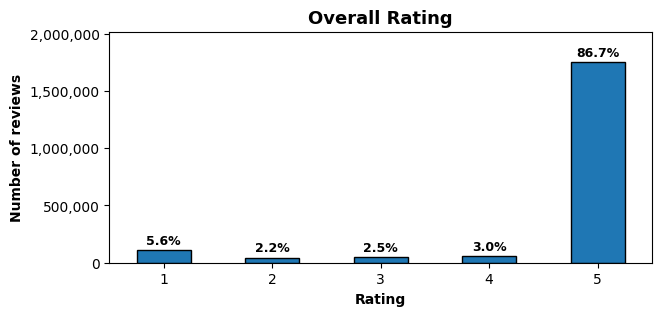

In [45]:
ratings = data_reviews["rating"]

print("Rating:")
my.display_collapsible(
    my.calc_summaries(ratings), "Descriptive statistics (overall rating)"
)
my.display_collapsible(
    [round(i, 3) for i in sms.DescrStatsW(ratings).tconfint_mean()],
    "Confidence interval of mean (overall rating)",
    sep=" – ",
)

print("Analysis of counts per rating:")
counts = ratings.value_counts().sort_index()
analyze_counts(
    counts,
    by="rating",
    title="Overall Rating",
    rot=0,
);

**Results.** 
Rating scores range from 1 (worst) to 5 (best) points.
The distribution of rating values is highly skewed with mean overall rating equal to 4.630 (CI 4.629–4.631).
The median of ratings is 5 points and the dominant rating (which appeared in 86.7% of reviews) is also 5 points. 
All the remaining rating values are much less frequent (the differences in proportions between all five rating groups are significant).

## Podcast Categories

**Question:**  Which number of categories per podcast is most common?   
**Population:** Podcasts on the Apple Podcasts platform.    

,n_categories,n_podcasts,percent,ci_lower,ci_upper,cld,spaced_cld
0,1,"80,188",73.2%,72.8%,73.5%,a,a____
1,2,"28,090",25.6%,25.3%,26.0%,b,_b___
2,3,"1,246",1.1%,1.1%,1.2%,c,__c__
3,4,75,0.1%,0.1%,0.1%,d,___d_
4,5,3,<0.1%,<0.1%,<0.1%,e,____e


,count,min,max,range,mean,median,std,mad,skew
n_podcasts,5,3,"80,188","80,185","21,920","1,246","34,707","1,243",1.68
percent,5,<0.1%,73.2%,73.2%,20.0%,1.1%,31.7%,1.1%,1.68


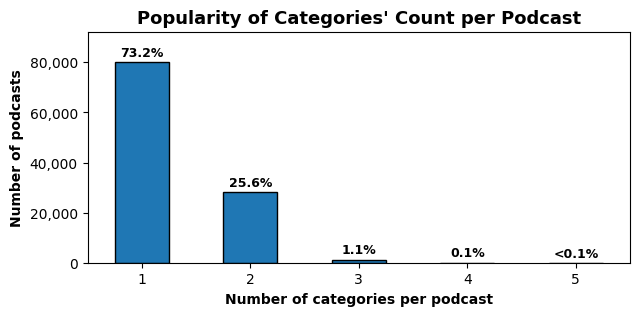

In [46]:
n_podcasts_per_n_main_categories = (
    n_categories_per_podcast["n_categories"].value_counts().sort_index()
)
analyze_counts(
    n_podcasts_per_n_main_categories,
    "n_categories",
    counts_of="podcast",
    xlabel="Number of categories per podcast",
    title="Popularity of Categories' Count per Podcast",
    rot=0,
);

**Results.**
Podcasts have up to 5 main categories.
Differences in proportions between all the groups (of the number of categories per podcast) are statistically significant. 
Almost 3/4-ths of podcasts (n=80,188, 73.2% CI 72.8%–73.5%) have only one category and this is the most common choice, and slightly more than 1/4-th (n=28,090, 25.6% CI 25.3%–26.0%) have 2 categories.

<br>

**Question:**  Which number of categories per podcast is best rated?   
**Population:** Podcasts on the Apple Podcasts platform.    

,Source,ddof1,H,p-unc
Kruskal,n_categories,4,309.54,p < 0.001


,n_categories,cld,spaced_cld,mean,ci_lower,ci_upper
0,1,a,a__,4.80,4.80,4.81
1,2,b,_b_,4.83,4.82,4.83
2,3,c,__c,4.84,4.82,4.86
3,4,bc,_bc,4.73,4.58,4.87
4,5,abc,abc,4.87,4.47,5.27


,count,min,max,range,mean,median,std,mad,skew
mean,5,4.73,4.87,0.14,4.81,4.83,0.05,0.02,-1.21


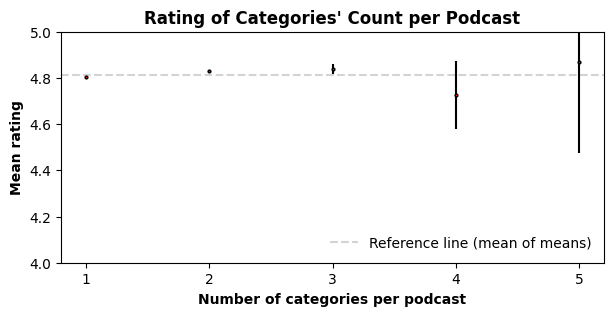

In [47]:
analyze_numeric_groups(
    "mean_rating",
    by="n_categories",
    data=data_for_n_reviews_corr,
    xlabel="Number of categories per podcast",
    ylabel="Mean rating",
    title="Rating of Categories' Count per Podcast",
);

*Note.* Even though for 5 categories per podcast the upper bound of CI is above 5 (the CI calculation method does not know what is the range of possible values of ratings), the plot shows rating limits only up to 5. 

**Results.** Change from 1 to 3 categories per podcast shows a small increasing trend (from rating 4.80 to 4.84). For 4 and 5 categories per podcast errors are high due to the small sample size and no trends are visible here.

<br>

**Question:**  Which number of sub-categories per podcast is the most common?   
**Population:** Podcasts on the Apple Podcasts platform.    

,n_subcategories,n_podcasts,percent,ci_lower,ci_upper,cld,spaced_cld
0,1,"44,145",40.3%,39.9%,40.7%,a,a_______
1,2,"39,373",35.9%,35.5%,36.3%,b,_b______
2,3,"16,473",15.0%,14.7%,15.3%,c,__c_____
3,4,"8,796",8.0%,7.8%,8.3%,d,___d____
4,5,648,0.6%,0.5%,0.7%,e,____e___
5,6,146,0.1%,0.1%,0.2%,f,_____f__
6,7,18,<0.1%,<0.1%,<0.1%,g,______g_
7,8,3,<0.1%,<0.1%,<0.1%,h,_______h


,count,min,max,range,mean,median,std,mad,skew
n_podcasts,8,3,"44,145","44,142","13,700","4,722","18,309","4,712",1.09
percent,8,<0.1%,40.3%,40.3%,12.5%,4.3%,16.7%,4.3%,1.09


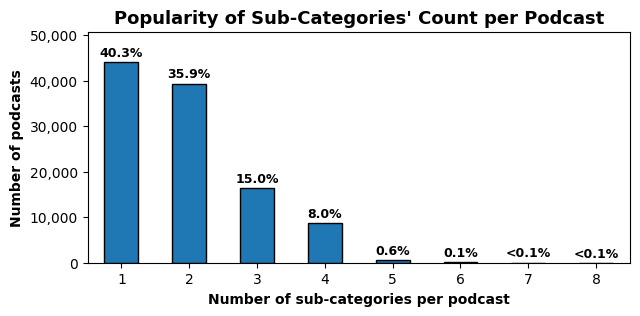

In [48]:
n_podcasts_per_n_sub_categories = (
    n_categories_per_podcast["n_subcategories"].value_counts().sort_index()
)
analyze_counts(
    n_podcasts_per_n_sub_categories,
    "n_subcategories",
    counts_of="podcast",
    xlabel="Number of sub-categories per podcast",
    ylabel="Number of podcasts",
    title="Popularity of Sub-Categories' Count per Podcast",
    rot=0,
);

**Results.** Differences between all groups are significant. Most common are podcasts with a single subcategory (40.3%), but two-subcategory podcasts are almost equally common (35.9%).

We can notice that single-category podcasts in the sample have up to 4 sub-categories:

In [49]:
categories_crosstab = pd.crosstab(
    n_categories_per_podcast.n_subcategories,
    n_categories_per_podcast.n_categories,
)

categories_crosstab

n_categories,1,2,3,4,5
n_subcategories,,,,,
1,44145,0,0,0,0
2,30907,8466,0,0,0
3,5085,11115,273,0,0
4,51,8316,415,14,0
5,0,188,436,23,1
6,0,5,113,28,0
7,0,0,7,10,1
8,0,0,2,0,1


<br><br>

**Question:**  Which categories are the most popular among Apple Podcasts' creators?  
**Population:** Podcast categories on the Apple Podcasts platform.   


,category,n_podcasts,percent,ci_lower,ci_upper,cld,spaced_cld
0,society/culture,"27,536",13.0%,12.8%,13.2%,a,a_______________
1,religion/spirituality,"23,409",11.1%,10.9%,11.3%,b,_b______________
2,business,"22,390",10.6%,10.4%,10.8%,c,__c_____________
3,education,"20,700",9.8%,9.6%,10.0%,d,___d____________
4,arts,"16,099",7.6%,7.4%,7.8%,e,____e___________
5,comedy,"14,548",6.9%,6.7%,7.0%,f,_____f__________
6,health/fitness,"14,504",6.8%,6.7%,7.0%,f,_____f__________
7,sports,"13,138",6.2%,6.0%,6.4%,g,______g_________
8,leisure,"12,023",5.7%,5.5%,5.8%,h,_______h________
9,tv/film,"10,794",5.1%,5.0%,5.2%,i,________i_______


,count,min,max,range,mean,median,std,mad,skew
n_podcasts,19,938,"27,536","26,598","11,145","10,794","8,251","7,419",0.44
percent,19,0.4%,13.0%,12.6%,5.3%,5.1%,3.9%,3.5%,0.44


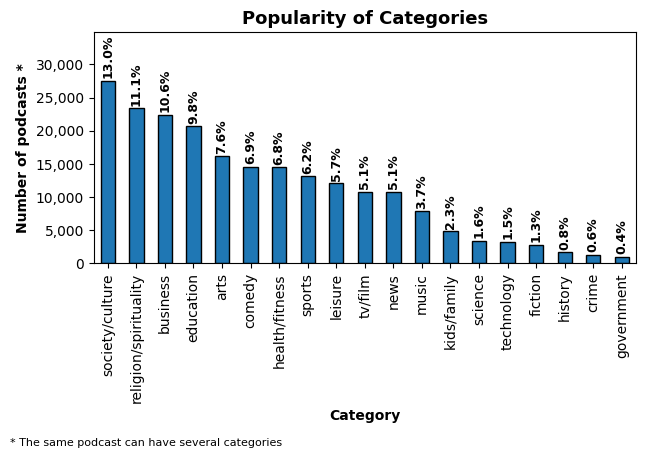

In [50]:
n_podcasts_per_category = data_categories["category"].value_counts()

res_counts_category = analyze_counts(
    n_podcasts_per_category,
    by="category",
    counts_of="podcast",
    ylabel="Number of podcasts *",
    title="Popularity of Categories",
    rot=90,
    label_rotation=90,
    y_lim_max=34900,
)

plt.figtext(
    0.2,
    -0.5,
    "* The same podcast can have several categories",
    wrap=True,
    horizontalalignment="center",
    fontsize=8,
);

**Results.**
The chi-square goodness-of-fit test shows significant differences between the popularity of categories among podcast creators (p < 0.001). So *post-hoc* pair-wise comparisons were performed. 
Category "society/culture" 13.0% (95% CI 12.8%-13.2%) was the most popular followed by "religion/spirituality" 11.1% (95% CI 10.9%-11.3%), "business" 10.6% (95% CI 10.4%-10.8%), and	"education"	9.8% (95% CI 9.6%-10.0%). Differences were significant between all the groups except "comedy" and "health/fitness", "tv/film" and "news" as well as "science" and "technology".

<br><br>

**Question:**  Which categories are best rated?  
**Population:** Podcast categories on the Apple Podcasts platform.   

,Source,ddof1,H,p-unc
Kruskal,category,18,3039.94,p < 0.001


,category,cld,spaced_cld,mean,ci_lower,ci_upper
0,business,a,a__________,4.89,4.88,4.90
1,religion/spirituality,a,a__________,4.88,4.87,4.89
2,health/fitness,bc,_bc________,4.86,4.85,4.87
3,education,b,_b_________,4.84,4.83,4.85
4,comedy,cd,__cd_______,4.84,4.83,4.85
5,society/culture,cd,__cd_______,4.83,4.82,4.84
6,kids/family,de,___de______,4.83,4.81,4.85
7,music,bc,_bc________,4.83,4.81,4.84
8,fiction,efg,____efg____,4.80,4.78,4.83
9,leisure,ef,____ef_____,4.80,4.79,4.81


,count,min,max,range,mean,median,std,mad,skew
mean,19,4.49,4.89,0.41,4.77,4.80,0.10,0.05,-1.47


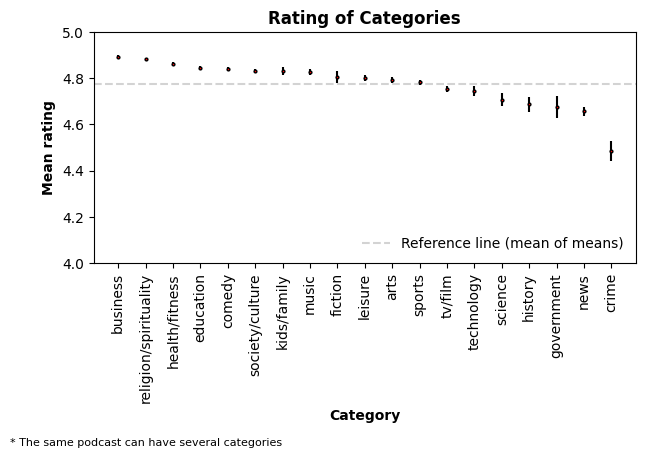

In [51]:
res_rating_category = analyze_numeric_groups(
    "mean_rating",
    by="category",
    data=data_categories_reviews_ratings,
    ylabel="Mean rating",
    title="Rating of Categories",
)

plt.figtext(
    0.2,
    -0.5,
    "* The same podcast can have several categories",
    wrap=True,
    horizontalalignment="center",
    fontsize=8,
)

plt.xticks(rotation=90);

**Results.** "Business" (mean rating 4.89 CI 4.88–4.90) and "religion/spirituality" (4.88 CI 4.87-4.89) are the best-rated categories (no statistically significant difference between them). They differ significantly from the other categories, but the difference from the next best categories is tiny: the difference is only at the second decimal position or rating value. The smallest average rating (4.49 CI 4.44–4.53) is in the "crime" category.

<br>

**Question:** Is there a relationship between the number of reviews and the average rating grouped by category?  

Spearman's correlation: r = 0.77, p < 0.001


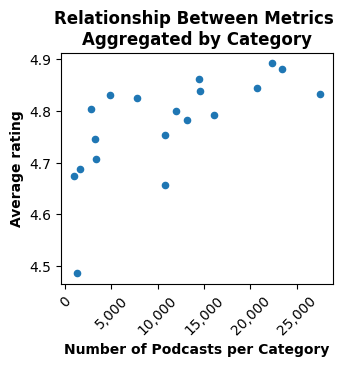

In [52]:
plot_scatter(
    res_counts_category,
    res_rating_category,
    by="category",
    corr="Spearman",
    counts_of="podcast",
)
plt.xlabel("Number of Podcasts per Category")
plt.title("Relationship Between Metrics \nAggregated by Category");

**Results:** average category rating and number of podcasts per category are positively correlated (Spearman r = 0.77, p < 0.001).

## Temporal Trends and Patterns 

The dataset contains reviews created between **2005-12-09** and **2022-12-08**. This spans approximately **17 years**.
So in this sub-section, we investigate if there are any patterns or correlations in ratings and amount of reviews when these metrics are aggregated by time periods of various granularity (years, months, days of week, and hours).

In [53]:
my.display_collapsible(
    my.count_unique(data_reviews), "Counts of unique values by variable"
)

print("Dates of newest and oldest review:")
my.as_df(
    data_reviews["created_at"].dt.date.agg(["min", "max"]),
    "date_type",
    "value",
)

,n_unique,percent_unique
podcast_id,111125,5.5%
review_title,1117416,55.2%
content,2008001,99.2%
rating,5,<0.1%
author_id,1451063,71.7%
created_at,2012360,99.4%
year,18,<0.1%
month,12,<0.1%
weekday,7,<0.1%
hour,24,<0.1%


Dates of newest and oldest review:


,date_type,value
0,min,2005-12-09
1,max,2022-12-08


### Reviews and Ratings by Year

**Question:** Does the number of reviews change from year to year?  
**Population:** Reviews of podcasts on the Apple Podcasts platform.

,year,n_reviews,percent,ci_lower,ci_upper,cld,spaced_cld
0,2005,208,<0.1%,<0.1%,<0.1%,a,a_________________
1,2006,"3,378",0.2%,0.2%,0.2%,b,_b________________
2,2007,"5,917",0.3%,0.3%,0.3%,c,__c_______________
3,2008,"8,502",0.4%,0.4%,0.4%,d,___d______________
4,2009,"11,173",0.6%,0.5%,0.6%,e,____e_____________
5,2010,"12,880",0.6%,0.6%,0.7%,f,_____f____________
6,2011,"17,631",0.9%,0.9%,0.9%,g,______g___________
7,2012,"26,233",1.3%,1.3%,1.3%,h,_______h__________
8,2013,"25,573",1.3%,1.2%,1.3%,i,________i_________
9,2014,"36,498",1.8%,1.8%,1.8%,j,_________j________


,count,min,max,range,mean,median,std,mad,skew
n_reviews,18,208,"434,540","434,332","112,482","31,366","143,158","29,224",1.26
percent,18,<0.1%,21.5%,21.5%,5.6%,1.5%,7.1%,1.4%,1.26


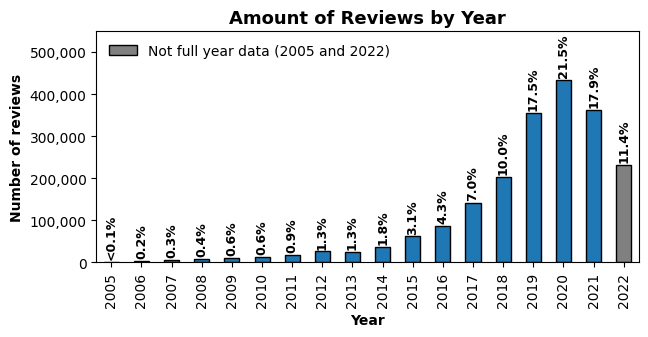

In [54]:
counts = data_reviews["year"].value_counts().sort_index()
res_counts_y = analyze_counts(
    counts,
    by="year",
    title="Amount of Reviews by Year",
    rot=90,
    label_rotation=90,
    color=["grey", *[blue for i in range(16)], "grey"],
    y_lim_max=549000,
)

plt.gca().legend(
    ["Not full year data (2005 and 2022)"], frameon=False, loc="upper left"
);

**Results.** Test results showed that differences in the number of reviews by year are significant. From 2005 to 2020 the number of reviews was increasing, reaching the peak of 434,582 reviews per year in 2020  and after that a decreasing trend is visible. 

We cannot do strict conclusions on years 2005 and 2022 as not full-year data was included there.

<br>

**Question:** Do the ratings change from year to year?  
**Population:** Reviews of podcasts on the Apple Podcasts platform.


,Source,ddof1,H,p-unc
Kruskal,year,17,14078.86,p < 0.001


,year,cld,spaced_cld,mean,ci_lower,ci_upper
0,2005,abcdefgh,abcdefgh___,4.80,4.70,4.89
1,2006,ij,________ij_,4.58,4.55,4.62
2,2007,i,________i__,4.53,4.51,4.56
3,2008,jk,_________jk,4.59,4.57,4.61
4,2009,j,_________j_,4.57,4.55,4.59
5,2010,ak,a_________k,4.58,4.56,4.60
6,2011,b,_b_________,4.62,4.61,4.64
7,2012,c,__c________,4.70,4.69,4.71
8,2013,c,__c________,4.72,4.71,4.73
9,2014,de,___de______,4.80,4.79,4.81


,count,min,max,range,mean,median,std,mad,skew
mean,18,4.49,4.81,0.32,4.66,4.62,0.10,0.08,0.17


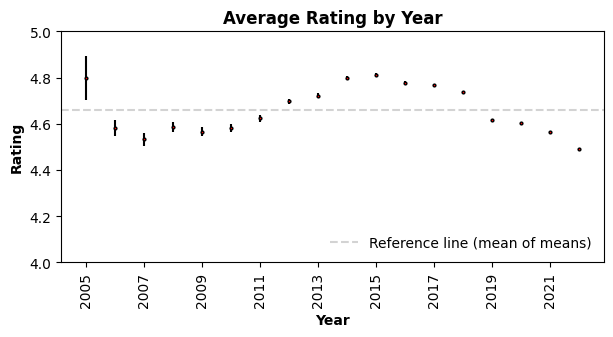

In [55]:
# Average rating
res_ratings_y = analyze_ratings(by="year", title="Average Rating by Year")
my.ax_xaxis_integer_ticks(min_n_ticks=8, rot=90)

**Results.** Estimates of yearly mean ratings range from 4.49 to 4.81.
Excluding the year 2005 when less than a month was included, the average rating was gradually increasing until reached a top estimate of 4.81 in 2015 (the difference is not significant compared to 2014, but significant compared to all other years). From 2015 till 2022 a decreasing trend is visible.
Yet, no strict conclusions should be done about the year 2022, as information on 3 last weeks of December is not still included.

<br>

**Question:** Is there a relationship between the number of reviews and the average rating grouped by year?  


Spearman's correlation: r = 0.39, p = 0.141


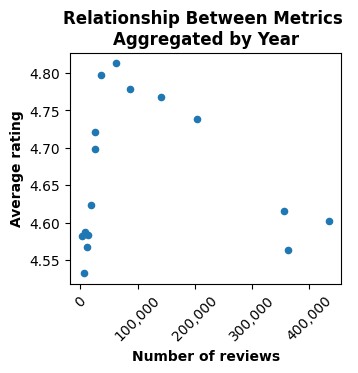

In [56]:
plot_scatter(
    res_counts_y.query("'2006' <= year <= '2021'"),
    res_ratings_y.query("'2006' <= year <= '2021'"),
    by="year",
    corr="Spearman",
)

**Results.**
No significant monotonic relationship was detected between the number of reviews and average rating grouped by years. Yet the plot indicates that there might be a non-linear non-monotonic relationship.

### Reviews and Ratings by Month of Year

**Question:** Does the number of reviews change from month to month? Is an annual pattern present?   
**Population:** Reviews of podcasts on the Apple Podcasts platform.

,month,n_reviews,percent,ci_lower,ci_upper,cld,spaced_cld
0,1,"144,131",8.0%,8.0%,8.1%,ab,ab_______
1,2,"143,178",8.0%,7.9%,8.0%,a,a________
2,3,"145,510",8.1%,8.1%,8.2%,bc,_bc______
3,4,"145,808",8.1%,8.1%,8.2%,c,__c______
4,5,"148,403",8.3%,8.2%,8.3%,d,___d_____
5,6,"148,644",8.3%,8.2%,8.3%,d,___d_____
6,7,"152,979",8.5%,8.5%,8.6%,e,____e____
7,8,"157,771",8.8%,8.7%,8.9%,f,_____f___
8,9,"160,106",8.9%,8.9%,9.0%,g,______g__
9,10,"164,308",9.2%,9.1%,9.2%,h,_______h_


,count,min,max,range,mean,median,std,mad,skew
n_reviews,12,"137,453","164,308","26,855","149,434","147,106","7,855","3,451",0.63
percent,12,7.7%,9.2%,1.5%,8.3%,8.2%,0.4%,0.2%,0.63


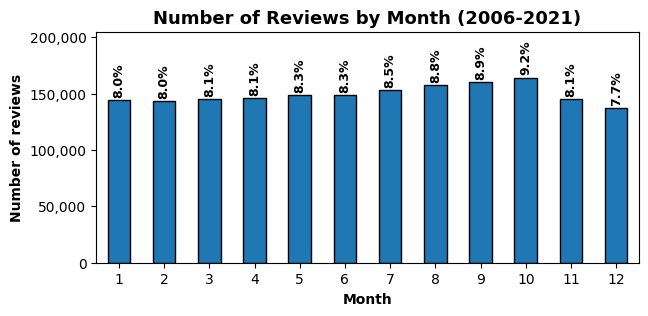

In [57]:
data_reviews_2006_2021 = data_reviews.query("2006 <= year <= 2021")
counts = data_reviews_2006_2021["month"].value_counts().sort_index()
res_counts_m = analyze_counts(
    counts,
    by="month",
    title="Number of Reviews by Month (2006-2021)",
    rot=0,
    label_rotation=90,
    y_lim_max=205000,
)

**Results.**
Comparing the number of reviews by month, an extremely small increase in the first half of the year (from 8.0 to 8.3% of all reviews), a little bit more sudden increasing trend from the beginning of summer (8.3%) to October (9.2%) can be noticed. The biggest drop (to 7.7%) is in December. The difference between October and December is statistically significant.

<br>

**Question:** Are there any differences in ratings comparing different months of the year? Is an annual pattern present?  
**Population:** Reviews of podcasts on the Apple Podcasts platform.

,Source,ddof1,H,p-unc
Kruskal,month,11,341.80,p < 0.001


,month,cld,spaced_cld,mean,ci_lower,ci_upper
0,1,ab,ab____,4.66,4.66,4.67
1,2,c,__c___,4.67,4.67,4.68
2,3,ad,a__d__,4.65,4.64,4.65
3,4,bc,_bc___,4.66,4.66,4.67
4,5,ab,ab____,4.66,4.65,4.66
5,6,ef,____ef,4.63,4.63,4.64
6,7,ad,a__d__,4.65,4.65,4.66
7,8,de,___de_,4.64,4.64,4.65
8,9,de,___de_,4.64,4.64,4.65
9,10,de,___de_,4.64,4.64,4.65


,count,min,max,range,mean,median,std,mad,skew
mean,12,4.63,4.67,0.05,4.65,4.65,0.01,0.01,0.09


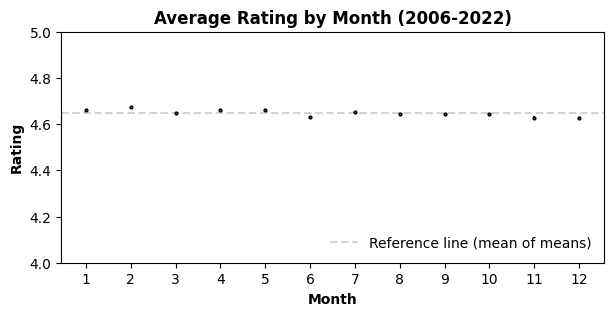

In [58]:
res_ratings_m = analyze_ratings(
    by="month",
    title="Average Rating by Month (2006-2022)",
    data=data_reviews_2006_2021,
)
my.ax_xaxis_integer_ticks(min_n_ticks=12)

**Results.** The ratings (although between some months their differences are statistically significant) vary in a narrow range of 0.06 points.

<br>

**Question:** Is there a relationship between the number of reviews and the average rating grouped by month?

Spearman's correlation: r = -0.12, p = 0.713


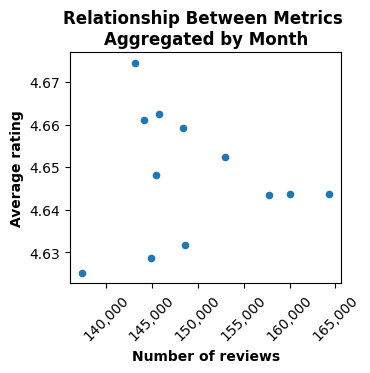

In [59]:
plot_scatter(res_counts_m, res_ratings_m, by="month", corr="Spearman")

**Results.**
No significant relationship was detected between the number of reviews and the average rating grouped by years.

### Reviews and Ratings by Day of Week

**Question:** Is there a difference in the number of reviews between days of the week? Is a weekly pattern present?   
**Population:** Reviews of podcasts on the Apple Podcasts platform.

,weekday,n_reviews,percent,ci_lower,ci_upper,cld,spaced_cld
0,Monday,"301,345",14.9%,14.8%,15.0%,a,a_____
1,Tuesday,"340,186",16.8%,16.7%,16.9%,b,_b____
2,Wednesday,"344,212",17.0%,16.9%,17.1%,c,__c___
3,Thursday,"332,548",16.4%,16.4%,16.5%,d,___d__
4,Friday,"293,180",14.5%,14.4%,14.5%,e,____e_
5,Saturday,"206,866",10.2%,10.2%,10.3%,f,_____f
6,Sunday,"206,344",10.2%,10.1%,10.2%,f,_____f


,count,min,max,range,mean,median,std,mad,skew
n_reviews,7,"206,344","344,212","137,868","289,240","301,345","59,599","38,841",-0.82
percent,7,10.2%,17.0%,6.8%,14.3%,14.9%,2.9%,1.9%,-0.82


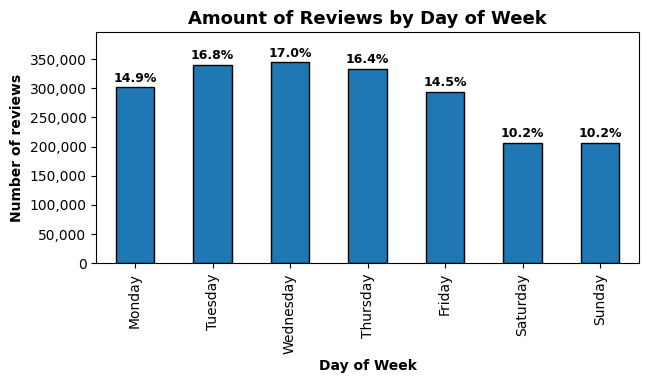

In [60]:
counts = data_reviews["weekday"].value_counts().sort_index()
res_counts_d = analyze_counts(
    counts,
    by="weekday",
    xlabel="Day of Week",
    title="Amount of Reviews by Day of Week",
)

**Results.** The analysis of weekly patterns revealed that most reviews are created in the middle of the week (e.g., on Wednesday on average 17.0% CI 16.9-17.1% of weekly reviews are created) and least on weekends (10.2% of weekly reviews on each day). Differences are significant between all days except Sunday and Saturday.

<br>

**Question:** Are there any differences in ratings comparing different days of the week? 
Is a weekly pattern present?  
**Population:** Reviews of podcasts on the Apple Podcasts platform.

,Source,ddof1,H,p-unc
Kruskal,weekday,6,222.02,p < 0.001


,weekday,cld,spaced_cld,mean,ci_lower,ci_upper
0,Monday,a,a___,4.62,4.62,4.63
1,Tuesday,b,_b__,4.63,4.63,4.64
2,Wednesday,c,__c_,4.64,4.64,4.65
3,Thursday,b,_b__,4.63,4.63,4.64
4,Friday,bc,_bc_,4.64,4.63,4.64
5,Saturday,a,a___,4.62,4.61,4.62
6,Sunday,d,___d,4.61,4.60,4.61


,count,min,max,range,mean,median,std,mad,skew
mean,7,4.61,4.64,0.04,4.63,4.63,0.01,0.01,-0.82


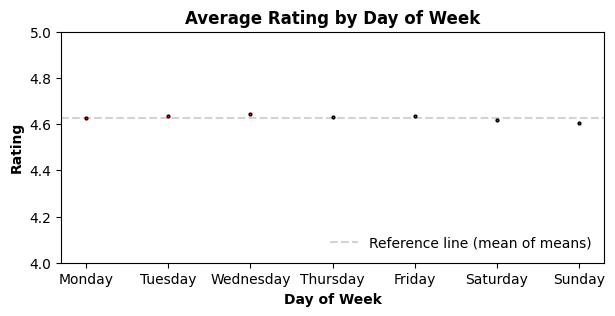

In [61]:
res_ratings_d = analyze_ratings(
    by="weekday", title="Average Rating by Day of Week", xlabel="Day of Week"
)

**Results.** The values of the ratings vary in a very narrow range of 0.04 points. Even though differences between some days are significant, they are practically negligible.

<br>

**Question:** Is there a relationship between the number of reviews and the average rating grouped by the day of the week?  

Spearman's correlation: r = 0.79, p = 0.036


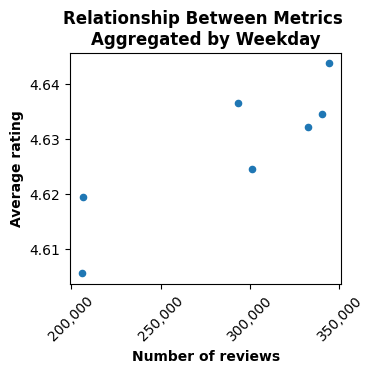

In [62]:
plot_scatter(res_counts_d, res_ratings_d, by="weekday", corr="Spearman")

**Results.**
A significant positive relationship between the number of reviews and average rating grouped by weekday is detected (Spearman's r = 0.79, p = 0.036). This shows that a bigger quantity of reviews is related to a better average rating.


### Reviews by Hour of Day

**Question:** Is there a difference in the number of reviews between hours of the day?
Is a daily pattern present?  
**Population:** Reviews of podcasts on the Apple Podcasts platform.


,hour,n_reviews,percent,ci_lower,ci_upper,cld,spaced_cld
0,0,"22,813",1.1%,1.1%,1.1%,a,a_________________
1,1,"17,536",0.9%,0.8%,0.9%,b,_b________________
2,2,"18,421",0.9%,0.9%,0.9%,c,__c_______________
3,3,"29,007",1.4%,1.4%,1.5%,d,___d______________
4,4,"48,771",2.4%,2.4%,2.4%,e,____e_____________
5,5,"73,306",3.6%,3.6%,3.7%,f,_____f____________
6,6,"97,458",4.8%,4.8%,4.9%,g,______g___________
7,7,"115,387",5.7%,5.6%,5.7%,h,_______h__________
8,8,"125,262",6.2%,6.1%,6.2%,ij,________ij________
9,9,"126,314",6.2%,6.2%,6.3%,i,________i_________


,count,min,max,range,mean,median,std,mad,skew
n_reviews,24,"17,536","126,314","108,778","84,362","101,574","38,270","23,329",-0.66
percent,24,0.9%,6.2%,5.4%,4.2%,5.0%,1.9%,1.2%,-0.66


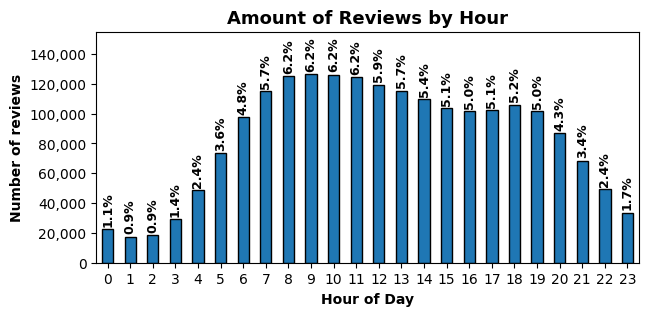

In [63]:
counts = data_reviews["hour"].value_counts().sort_index()
res_counts_h = analyze_counts(
    counts,
    by="hour",
    xlabel="Hour of Day",
    title="Amount of Reviews by Hour",
    rot=0,
    label_rotation=90,
    y_lim_max=155000,
)

**Results.** Daily patterns in the number of reviews are very clear: there are two peeks (bigger at 8-11 o'clock, 6.2% of reviews each hour, and lower at around 18 o'clock, 5.2% reviews) when users are most active and one (at around 1-2 AM, 0.9% reviews each hour) when users are least active.

The time zone is UTC-7:00, so 8-11 AM in UTC-7:00 is 18 o'clock in some European countries. We do not have reviewers' location data, so we can only assume that this activity mainly comes from Europe.

<br>

**Question:** Are there any differences in ratings comparing different hours of the day?
Is a daily pattern present?   
**Population:** Reviews of podcasts on the Apple Podcasts platform.

,Source,ddof1,H,p-unc
Kruskal,hour,23,3321.07,p < 0.001


,hour,cld,spaced_cld,mean,ci_lower,ci_upper
0,0,ab,ab_________,4.49,4.47,4.50
1,1,a,a__________,4.46,4.44,4.48
2,2,ab,ab_________,4.49,4.47,4.50
3,3,b,_b_________,4.51,4.50,4.53
4,4,c,__c________,4.54,4.53,4.55
5,5,d,___d_______,4.58,4.57,4.59
6,6,e,____e______,4.61,4.60,4.61
7,7,f,_____f_____,4.63,4.62,4.63
8,8,fg,_____fg____,4.64,4.63,4.64
9,9,fgh,_____fgh___,4.64,4.64,4.65


,count,min,max,range,mean,median,std,mad,skew
mean,24,4.46,4.68,0.22,4.60,4.64,0.06,0.03,-1.01


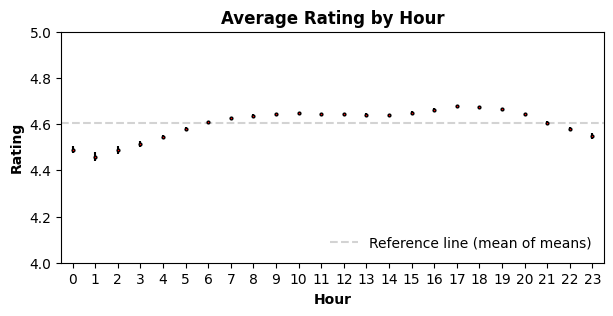

In [64]:
res_ratings_h = analyze_ratings(by="hour", title="Average Rating by Hour")
my.ax_xaxis_integer_ticks(min_n_ticks=24)
plt.gca().set_xlim([-0.5, 23.5]);

**Results.** The pattern in ratings by the hour of the day is also visible and they reflect the trends in the number of reviews: during daytime, the ratings tend to be higher and at night they are lowest.

<br>

**Question:** Is there a relationship between the number of reviews and average rating grouped by hour of day? 

Spearman's correlation: r = 0.69, p < 0.001


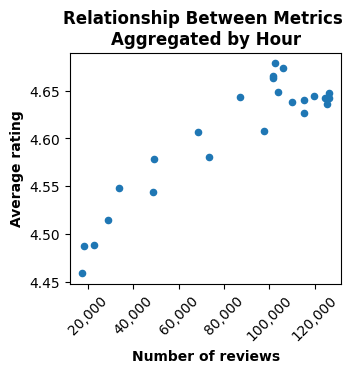

In [65]:
plot_scatter(res_counts_h, res_ratings_h, by="hour", corr="Spearman")

**Results.**
A significant positive relationship between the number of reviews and average rating grouped by hour of the day is detected (Spearman's r = 0.69, p < 0.001). This shows that a bigger quantity of reviews is related to a better average rating.

## Correlation between Number of Reviews, Rating and Other Features

**Question:** Does the rating of reviews correlate to other features 
(number of categories/sub-categories per podcast, various podcast title, review title and body length metrics)?  
**Population:** Reviews of podcasts on the Apple Podcasts platform.


Spearman correlation analysis is performed.

In [66]:
# Correlation between rating and other features:
corr_result = do_corr_1_vs_other(data_for_rating_corr, var_x="rating")

# Correlation between number of reviews and other features:
corr_result = do_corr_1_vs_other(
    data_for_n_reviews_corr, var_x="n_reviews", corr_result=corr_result
)

# To data frame
corr_result = pd.DataFrame(corr_result)

# Sort by correlation strength
corr_result = corr_result.sort_values(by="r", key=abs, ascending=False)

# Control for Type 1 error: add column for p adjusted values
corr_result["p_adj"] = [
    my.format_p(i)
    for i in sms.multipletests(corr_result["p"], method="holm")[1]
]

Correlation between rating and other features:

In [67]:
corr_result.query("variable_1=='rating'")

,variable_1,variable_2,r,p,p_adj
13,rating,review_body_n_words,-0.09,0.00,p < 0.001
12,rating,review_body_n_char,-0.09,0.00,p < 0.001
15,rating,review_body_title_n_char_ratio,-0.09,0.00,p < 0.001
16,rating,review_body_title_n_words_ratio,-0.07,0.00,p < 0.001
11,rating,review_title_avg_word_length,0.05,0.00,p < 0.001
8,rating,n_subcategories,0.05,0.00,p < 0.001
17,rating,review_body_title_avg_word_length_ratio,-0.04,0.00,p < 0.001
4,rating,podcast_title_n_char,0.03,0.00,p < 0.001
2,rating,slug_n_char_wo_hyphen,0.03,0.00,p < 0.001
0,rating,slug_n_char,0.03,0.00,p < 0.001


**Results:**
Despite the fact, that it is statistically significant, the relationship between *ratings* and other variables of investigation is small (|r| < 0.10). 
The highest is between:

- *rating* and *review length* (e.g., length in words, `review_body_n_words`) r = -0.09 (longer reviews to some extent tend to have worse ratings), 
- *rating* and *word length of review title* (`review_title_avg_word_length`) r = 0.05 (longer words in review title related to hardly noticeably better ratings) as well as 
- *rating* and *number of sub-categories* r = 0.05 (more sub-categories related to hardly noticeably better ratings).

<br>

**Question:** Does the number of reviews correlate to other features (mean podcast rating, number of categories/sub-categories per podcast, various podcast title, review title and body length metrics)?  
**Population:** Podcasts on the Apple Podcast platform. 

Correlation between number of reviews and other features:

In [68]:
corr_result.query("variable_1=='n_reviews'")

,variable_1,variable_2,r,p,p_adj
18,n_reviews,mean_rating,-0.40,0.00,p < 0.001
25,n_reviews,mean_review_body_title_n_char_ratio,0.33,0.00,p < 0.001
23,n_reviews,mean_review_body_n_words,0.32,0.00,p < 0.001
26,n_reviews,mean_review_body_title_n_words_ratio,0.32,0.00,p < 0.001
22,n_reviews,mean_review_body_n_char,0.32,0.00,p < 0.001
20,n_reviews,mean_review_title_n_words,0.20,0.00,p < 0.001
28,n_reviews,n_categories,0.17,0.00,p < 0.001
19,n_reviews,mean_review_title_n_char,0.17,0.00,p < 0.001
29,n_reviews,n_subcategories,0.14,0.00,p < 0.001
31,n_reviews,slug_n_hyphen,0.06,0.00,p < 0.001


As the correlation between `n_reviews` and `mean_rating` r = -0.40 looks suspicious (contradicts the results seen before), these variables will be plotted for further investigation:

,variable_1,variable_2,subset,r,p
0,n_reviews,mean_rating,All ratings,-0.40,0.00
1,n_reviews,mean_rating,Rating < 5,0.60,0.00


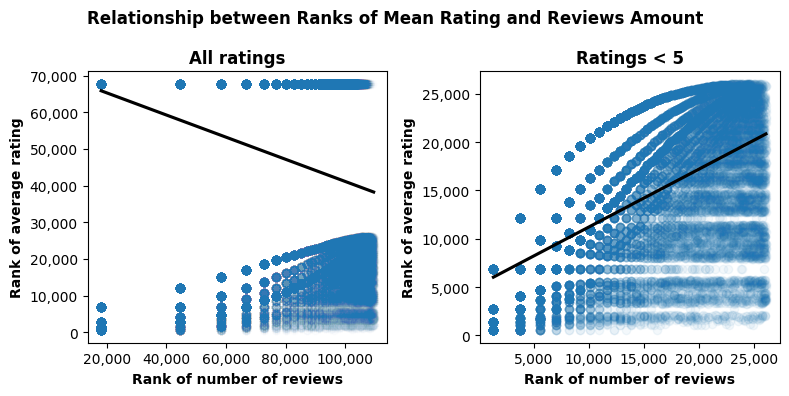

In [69]:
# Data
vars = ["n_reviews", "mean_rating"]
ranks_all = data_for_n_reviews_corr[vars].rank()
ranks_wo_rating_5 = (
    data_for_n_reviews_corr[vars].query("mean_rating < 5").rank()
)

# Correlation
res = do_corr_1_vs_other(ranks_all, "n_reviews")
res = do_corr_1_vs_other(ranks_wo_rating_5, "n_reviews", res)
res = pd.DataFrame(res)
res.insert(2, "subset", ["All ratings", "Rating < 5"])
display(res)

# Plot
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4))

# Subplot 1
sns.regplot(
    x="n_reviews",
    y="mean_rating",
    data=ranks_all,
    scatter_kws={"alpha": 0.01},
    line_kws={"color": "black"},
    ax=ax1,
)
ax1.set_xlabel("Rank of number of reviews")
ax1.set_ylabel("Rank of average rating")
ax1.set_title("All ratings")
my.ax_axis_comma_format(ax=ax1)

# Subplot 2
sns.regplot(
    x="n_reviews",
    y="mean_rating",
    data=ranks_wo_rating_5,
    scatter_kws={"alpha": 0.05},
    line_kws={"color": "black"},
    ax=ax2,
)

ax2.set_xlabel("Rank of number of reviews")
ax2.set_ylabel("Rank of average rating")
ax2.set_title("Ratings < 5")
my.ax_axis_comma_format(ax=ax2)

# Common
plt.suptitle("Relationship between Ranks of Mean Rating and Reviews Amount")
plt.tight_layout();

**Results:** In general, the number of reviews seems to have larger correlation coefficient estimates to some variables than ratings to other variables.

The largest correlation was detected between the number of reviews per podcast and mean podcast rating but after graphical investigation, it turned out that if the largest ratings are removed, the sign of correlation coefficient (and the slope of the regression line) changes from negative (Spearman's r = -0.40, p_adj < 0.001) to positive (r = 0.60, p < 0.001, p_adj was not calculated). This means that a high proportion of top ratings (equal values) distorted the results and indicates contradicting trends when these values are included and excluded.

A graphical investigation of a few more variables with top correlation did not reveal this kind of discrepancy (the plots are not included in the report).

The next biggest correlations were detected between:

- *amount of reviews* and various *review and review title length* metrics (e.g., `mean_review_body_title_n_char_ratio` = 0.33, `mean_review_body_n_words` r = 0.32, `mean_review_title_n_words` r = 0.20) that essentially show that longer reviews and review titles as well as the bigger difference between review and review title length are related to a larger number of reviews.
- the *number of reviews* and the *number of categories* (r = 0.17).

# Looker Studio Dashboard

A part of this project was to create a **dashboard** with at least 3 charts in Looker Studio.
So a tool that allows us to **interactively explore** temporal trends and patterns of ratings and number of reviews in various subsets of data was created and it is accessible [here](https://datastudio.google.com/reporting/e10e312b-8ccc-44b9-b85d-984956d496f0/page/RADAD){target="_blank"}.
The dashboard consists of 2 pages:

1) The first page contains plots with **Y-axis for ratings** ranging **from 1 to 5**. This version of the dashboard is more flexible for interactive analysis as a wider range of possible mean rating values can be visualized.
2) The second page contains the same plots just with **zoomed rating values**. This feature allows seeing (possible) patterns in ratings where differences between the values are small.
But this version of the dashboard is less friendly for interactive exploration.

A preview of the dashboards can be seen in the **print screens** below:

- blue columns represent the number of reviews and 
- red connected dots indicate the average rating.

Due to the 100 MB per dataset limitations of Looker Studio, only a subset of data (~92% of reviews from the `data_all` dataset) is used in the dashboard.

![The dashboard in which Y axis for ratings (on the right hand side) ranges from 1 to 5.](./img/dashboard-2022-12-28--b--ratings-range-1-5.jpg)

<br>

![The dashboard with zoomed rating values.](./img/dashboard-2022-12-28--a--zoomed-ratings.jpg)

# Main Findings

1) Sample size:
   - More than **100 thousand podcasts** and more than **2 million reviews** are included in the analysis.

2) **Ratings** (overall):
   - The distribution of ratings is asymmetric: the top rating (**5** points) is the **most common** (in 87% of reviews);
   - The median rating is **5** stars too;
   - The **mean** overall rating is **4.63**.

3) The analysis of **categories**:
   - There are **19 main categories** of podcasts (after merging similar sub-categories) and 110 sub-categories;
   - Each podcast has up to 5 main categories;
   - **Single-category podcasts** are **most common** (73% of all podcasts) but, compared to 2- and 3- category-per-podcast cases, are a **little bit less well-rated** (rating 4.80 vs. 4.83 and 4.84).
   - Average **category rating** and **number of podcasts** per category are positively **correlated** (Spearman r = 0.77, p < 0.001): categories with more reviews have better ratings (and vice versa).
   - The **most common categories** among podcast creators are:
       +  "society/culture" (13% of podcasts),
       +  *"religion/spirituality"* (11%),
       +  *"business"* (11%), and 
       +  "education" (10%).
   - The **least common** categories are:
       +  "history", *"crime"* and "government" (< 1% each).
   - The **best-rated categories** are *"business"* (rating is 4.89) and *"religion/spirituality"* (4.88).
   - The next best-rated categories differ from the best ones *only by the second decimal digit* (the difference is negligible although it is statistically significant).
   - The **worst-rated** category is *"crime"* (4.49).

4) **Temporal patterns and trends:**
   - Data covers the period from December **2005 to** December **2022** (**17 years**).
   - Difference between minimum and maximum ratings and amount of reviews as well as a correlation between these two metrics (ns – not significant):

      | Comparing                | Difference in Ratings | Difference in Amount of Reviews | Spearman's Correlation |
      |------------------|:-----------:|:------------------:|:------------------:|
      | Years (2006-2021)        | 0.28    | 23.3 %            | ns                     |
      | Months of year           | 0.05    | 1.5 %             | ns                     |
      | Days of week             | 0.04    | 6.8 %             | r = 0.79, p = 0.036    |
      | Hours of day (in UTC-07:00) | 0.22    | 5.4 %             | r = 0.69, p \< 0.001   |
      
   - **Year-to-year trends:**
       + Clear trends in both the amount of reviews and ratings are visible:
         + yearly number of **reviews** was **increasing till 2020** after that it is dropping.
         + the average yearly **rating** was **increasing till 2014-2015** after that it is dropping. 
   - **Month-to-month patterns:**
      + Overall, the largest amount of monthly reviews (9.2%) is created in October and the smallest (7.7%) in December.
      + Patterns of **ratings** are significant yet **negligible**.
   - **Weekly patterns** (by the day of the week):
      + The **largest amount** of reviews per day are created in the **middle of a week** (e.g., on Wednesday 17.0% of weekly reviews) and the **smallest amount is on weekends** (10.2% on each day).
      + Despite the fact that the range in ratings is small, a statistically significant **relationship** between the **number of reviews and** average **rating** grouped by weekday **is detected** (see table above).
   - **Daily patterns** (by hour of day):
      + Patterns in the **number of reviews and ratings** are very clear: during the **day time** of indicated time zone, **more reviews** per hour are created and **better** average **ratings** are given, while at **night time** (especially around 1 and 2 AM) **fewer reviews** are created **and ratings** are **worse**.
      + The **relationship** between the 2 metrics is statistically significant (see table above).
      




5) **Correlation analysis:**
   - Between reviews' ratings and other characteristics (including review, review title, podcast title length metrics, number of categories, and sub-categories), a statistically significant but **extremely low correlation** (Spearman's |r| < 0.10) is detected.
   - The correlation between the number of reviews per podcast and mean podcast rating gave contradicting results so they will not be further commented.
   - The correlation between the **number of reviews** per podcast **and review length** metrics was significant and positive (up to **r = 0.33**) showing that podcasts with more reviews tend to have longer reviews.
   - The correlation between the **number of reviews** and the **number of categories** per podcast is significant and positive (**r = 0.17**).


# Limitations and Suggestions for Improvement

Some ideas on how the analysis may be improved and what else can be analyzed:

- Confidence intervals and statistical hypothesis testing results could be displayed on a plot.
- In the analysis of temporal patterns and trends, periods of bigger granularity may influence patterns of lower granularity (e.g., weekly patterns may differ from year to year). This was not investigated.
- A more detailed analysis of separate podcasts and their characteristics was not performed.     
- A more detailed analysis of separate users/reviewers was not performed.     
- A more detailed analysis of the review text, review title, and podcast title may be performed, e.g.:
    - Language identification.
    - Analysis of emojis.
    - Sentiment analysis.
- The time duration between the newest and oldest review of each podcast may be analyzed.
- Dashboard:
  - A more detailed description of the dashboard and used variables could be provided.
  - Filters for categories are not included in the dashboard.
  - Only a fraction of the data analyzed in Python was included in the dashboard (due to technical reasons).
